In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install language-tool-python
!pip install translate

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 1.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=98fc28f199903b72ae5aadfef9145510e99363cc7da73f234bcafd7eb1aaf4cf
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [ ]:
from google.colab import drive # conectar con datos de drive
drive.mount('/content/gdrive')
from googletrans import Translator
import language_tool_python
import pandas as pd # manejo de data frame
import numpy as np # manejos matriciales
import nltk # paquete 1 de lenguaje natural
import spacy # paquete 2 de lenguaje natural
import re # paquete 2 de lenguaje natural
from textblob import TextBlob  #
import seaborn as sns # graficos
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords # conjunto de stopwords
from nltk.tokenize import TweetTokenizer # tokenizador de tweet
from nltk.stem import PorterStemmer # hacer steming palabras
from nltk.stem import LancasterStemmer # hacer steming palabras
from nltk.stem import WordNetLemmatizer # extraer el lema de una palabra
import matplotlib.pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud  # graficos de palabras
from transformers import MarianMTModel, MarianTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
# from translate import Translator


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
1+1

2

In [ ]:
datos_x = pd.read_csv("/content/gdrive/MyDrive/Aprendizaje no supervisado/2024-2/Bases de datos/tweets_masivo.csv", encoding="latin1")

datos_bancolombia= pd.read_csv("/content/gdrive/MyDrive/Aprendizaje no supervisado/2024-2/Bases de datos/noticias.csv")
filtro_eltiempo= datos_bancolombia["news_url_absolute"].apply(lambda x:"www.eltiempo.com" in x  )
eltiempo = datos_bancolombia[filtro_eltiempo]
eltiempo

,news_id,news_url_absolute,news_init_date,news_final_date,news_title,news_text_content
47,news10180,https://www.eltiempo.com/mundo/eeuu-y-canada/s...,2022-07-15,2022-07-30,Insolito: se disfrazo de abuela para robar un ...,Un criminal sorprendio a las autoridades de Mc...
57,news10204,https://www.eltiempo.com/economia/finanzas-per...,2022-07-30,2022-08-14,?En que consiste la banca grupal que comienza ...,"!hola! Aqui tambien puedes encontrar ""Mis Noti..."
62,news10236,https://www.eltiempo.com/justicia/servicios/qu...,2022-07-30,2022-08-14,?Que debo hacer si no puedo pagar una deuda co...,"Esta semana, en el programa del Consultorio Ju..."
63,news10239,https://www.eltiempo.com/economia/finanzas-per...,2022-07-30,2022-08-14,"Billetera digital: Nequi, Daviplata, dale! y m...",Son las seis de la manana. Hace frio. Miles de...
76,news10308,https://www.eltiempo.com/datos/gustavo-petro-y...,2022-07-15,2022-07-30,?Cuanto gastaron Gustavo Petro y Rodolfo Herna...,Segun los reportes en el portal Cuentas Claras...
...,...,...,...,...,...,...
23322,news99764,https://www.eltiempo.com/economia/sectores/muj...,2022-07-30,2022-08-14,Mujeres tienen un mayor empleo formal que los ...,Con el cambio que establecio el Dane sobre la ...
23324,news99785,https://www.eltiempo.com/colombia/otras-ciudad...,2022-07-30,2022-08-14,Posesion de Gustavo Petro: asi se vive el even...,Hoy es la ceremonia de posesion del presidente...
23326,news99789,https://www.eltiempo.com/tecnosfera/novedades-...,2022-07-30,2022-08-14,Acoso digital: al menos el 30 por ciento de lo...,Una nueva encuesta global de la firma Kaspersk...
23327,news99792,https://www.eltiempo.com/tecnosfera/novedades-...,2022-07-30,2022-08-14,"Asi funciona Starlink, el internet de Elon Mus...",Elon Musk tiene un nuevo y ambicioso proyecto ...


In [ ]:
datos_x=datos_x.dropna()

# Aálisis de sentimientos

En análisis de sentimientos, se asocia a 3 categorías: Positivo, negativo y neutral.

- TextBlob
- NLTK
- Transformer

In [ ]:
texto_prueba = datos_x["statement"].iloc[1]

## Con text blob

El análisis de sentimientos generado por esta librería, es polatity entre -1 y 1, valores negativos se asocia a que son negativos, valores positivos se asocia a que son positivos y 0 indica neutral.

Subjectivity el 1 se asocia que es un texto muy subjetivo, asociado a opiniones, sentimientos. Mientras que si se acerca a 0 es más objetivo, asociado a hechos.





In [ ]:
sentimientos =[] # creamos una lista vacia para guardar la información
for elemento in datos_x["statement"]: # por cada documento de los tweets
  blob = TextBlob(elemento) # aplicacmos el modelo.
  sentimiento= blob.sentiment.polarity # extraemos el sentimiento
  sentimientos.append(sentimiento) # Añadimos el sentimiento
datos_x["polarity_textblob"]=  sentimientos

<Axes: ylabel='polarity_textblob'>

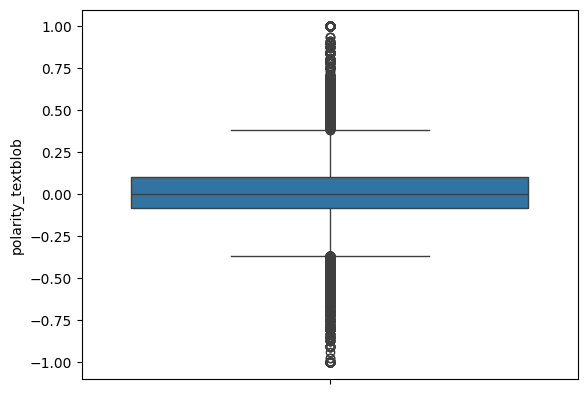

In [ ]:

sns.boxplot( datos_x["polarity_textblob"])

<Axes: xlabel='polarity_textblob', ylabel='Count'>

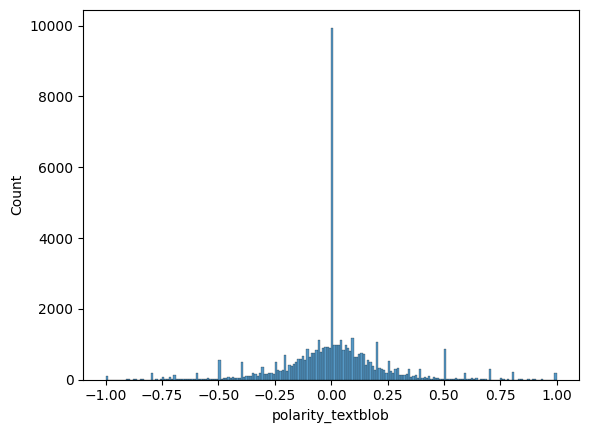

In [ ]:
sns.histplot( datos_x["polarity_textblob"])

En los gráficos anteriores, podemos observar la distribución del puntaje de polatity para todos los tweets.

In [ ]:
blob = TextBlob(texto_prueba ) # Aplicamos el algoritmo
(blob.sentiment)  # Polarity (-1 to 1), Subjectivity (0 to 1)
sentimiento = blob.sentiment.polarity # obtenemos el sentimiento
if sentimiento >0: # si es >0, positivo
  etiqueta= "positivo"
elif sentimiento <0: # Si es <0, negativo
  etiqueta= "negativo"
else: # en caso contrario, para este caso =0, neutral
  etiqueta= "neutral"
(etiqueta)



'negativo'

In [ ]:
sentimientos =[] # Creamos una lista, donde guardamos la etiqueta de sentimiento
for elemento in datos_x["statement"]: # por cada tweet realizamos:
  blob = TextBlob(elemento) # Aplicamos el algoritmo
  sentimiento= blob.sentiment.polarity # Extraemos el puntaje de sentimiento
  if sentimiento >0: # Si el puntaje es >0 positivo
    etiqueta= "positivo"
  elif sentimiento <0: # Si el puntaje es <0 negativo
    etiqueta= "negativo"
  else: # Caso contrario es neutral.
    etiqueta= "neutral"
  sentimientos.append(etiqueta)


In [ ]:
datos_x["sentimiento_textblob"]=  sentimientos
datos_x["sentimiento_textblob"].value_counts()

,count
sentimiento_textblob,
positivo,23113
negativo,20562
neutral,9006


Ahora podemos observar la frecuencia de cada sentimiento, podemos decir que la mayoría de los tweets son positivos.

## Con nltk

Arroja la probabilidad de cada categoría, por útlimo compound arroja la probabilidad

In [ ]:
sia = SentimentIntensityAnalyzer() # Implementamos el algoritmo
print(sia.polarity_scores(texto_prueba)) # este algoritmo nos devuelve un diccionario
sentimiento = sia.polarity_scores(texto_prueba)['compound']  # Devuelve un diccionario con los resultados
sentimiento

{'neg': 0.504, 'neu': 0.496, 'pos': 0.0, 'compound': -0.7269}


-0.7269

In [ ]:
sia = SentimentIntensityAnalyzer() # Definimos el algoritmo base.
sentimientos =[] # una lista vacia para los sentimientos
for elemento in datos_x["statement"]: # Por cada tweets, aplicamos un
  sentimiento = sia.polarity_scores(elemento)['compound']  # Devuelve un diccionario con los resultados}
  if sentimiento >0: # si es >0, es positivo
    etiqueta= "positivo"
  elif sentimiento <0: # si es <0, es negativo
    etiqueta= "negativo"
  else: # en caso contrario = 0, es neutral.
    etiqueta= "neutral"
  sentimientos.append(etiqueta)


In [ ]:
datos_x["sentimiento_nltk"]=  sentimientos
datos_x["sentimiento_nltk"].value_counts()

,count
sentimiento_nltk,
negativo,29212
positivo,17559
neutral,5910


A diferencia del algoritmo de textblob, este algoritmo identifica más tweets negativos, a diferencia del otro algoritmo.


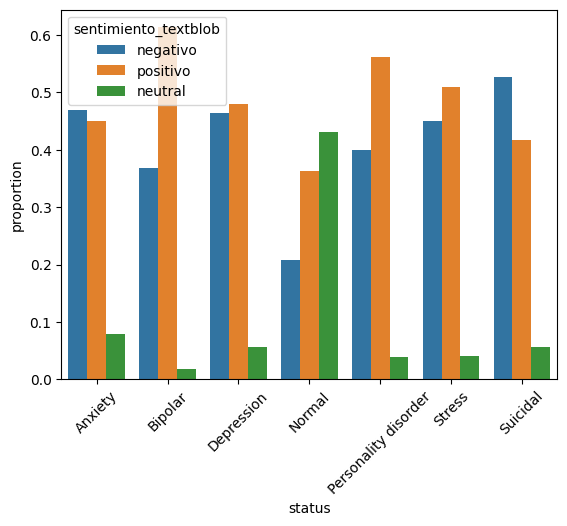

In [ ]:
tabla_frecuencia_relacion= datos_x.groupby('status')['sentimiento_textblob'].value_counts(normalize=True)
sns.barplot(data=tabla_frecuencia_relacion.reset_index(), x='status', y='proportion', hue='sentimiento_textblob')
plt.xticks(rotation=45)
plt.show()

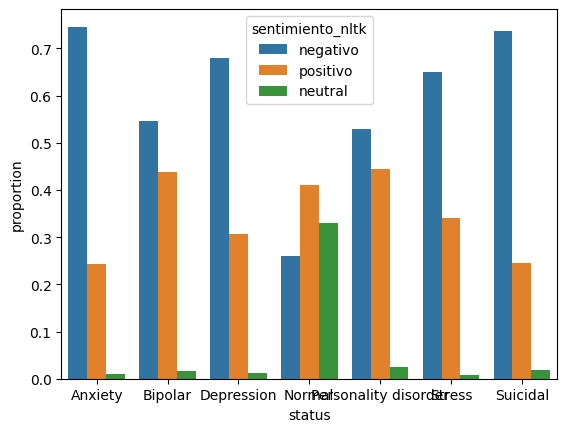

In [ ]:
tabla_frecuencia_relacion= datos_x.groupby('status')['sentimiento_nltk'].value_counts(normalize=True)
sns.barplot(data=tabla_frecuencia_relacion.reset_index(), x='status', y='proportion', hue='sentimiento_nltk')
plt.show()

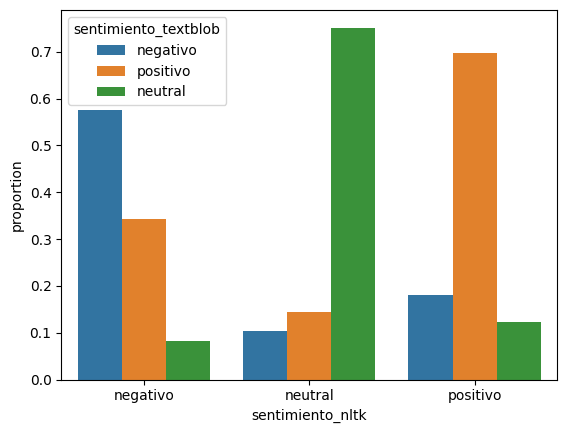

In [ ]:
tabla_frecuencia_relacion= datos_x.groupby('sentimiento_nltk')['sentimiento_textblob'].value_counts(normalize=True)
sns.barplot(data=tabla_frecuencia_relacion.reset_index(), x='sentimiento_nltk', y='proportion', hue='sentimiento_textblob')
plt.show()

In [ ]:
tabla_frecuencia_relacion= datos_x.groupby('status')['sentimiento_nltk'].value_counts(normalize=True)
sns.barplot(data=tabla_frecuencia_relacion.reset_index(), x='status', y='proportion', hue='sentimiento_nltk')
plt.show()

In [ ]:
datos_x["status"].value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


In [ ]:
sia.polarity_scores(texto_prueba)

{'neg': 0.504, 'neu': 0.496, 'pos': 0.0, 'compound': -0.7269}

Para todos los tweets, creemos una columna por cada método de sentimiento.

Los ciclos `for` en Python son una estructura de control que permite iterar sobre una secuencia de elementos, como listas, tuplas, diccionarios, cadenas, o cualquier otro iterable. En cada iteración, el ciclo toma un elemento de la secuencia y realiza las acciones indicadas dentro del bloque de código asociado al ciclo.

### ¿Cómo funciona un ciclo `for` en Python?

El ciclo `for` en Python se utiliza para recorrer los elementos de un iterable, como una lista o cadena. La sintaxis básica es:

```python
for elemento in secuencia:
    # Bloque de código
    # Se ejecuta una vez por cada elemento en la secuencia
```

### Componentes clave:
1. **`elemento`**: Es la variable que toma el valor de cada elemento en la secuencia en cada iteración.
2. **`secuencia`**: Es el iterable sobre el cual se está iterando. Puede ser una lista, tupla, cadena, rango, diccionario, etc.
3. **Bloque de código**: Es el conjunto de instrucciones que se ejecuta en cada iteración.



# Extracción de entidades

Cuando usas el modelo preentrenado de **spaCy** con `spacy.load("en_core_web_sm")`, puedes realizar **Reconocimiento de Entidades Nombradas (NER)**, lo que significa que el modelo identificará y clasificará ciertos tipos de entidades dentro del texto. El modelo en inglés, `en_core_web_sm`, reconoce las siguientes entidades:

### Entidades Reconocidas por `spacy.load("en_core_web_sm")`:

1. **PERSON**: Personas, figuras famosas o personajes ficticios.
   - Ejemplo: "Barack Obama", "Harry Potter".

2. **NORP**: Grupos étnicos, religiosos o políticos.
   - Ejemplo: "American", "Christian", "Communist".

3. **FAC**: Edificios, aeropuertos, carreteras, puentes, etc.
   - Ejemplo: "Eiffel Tower", "Wall Street".

4. **ORG**: Organizaciones, incluyendo compañías, agencias gubernamentales, instituciones.
   - Ejemplo: "Google", "United Nations", "NASA".

5. **GPE**: Países, ciudades o estados.
   - Ejemplo: "France", "New York", "California".

6. **LOC**: Lugares no geopolíticos (montañas, ríos, regiones).
   - Ejemplo: "Mount Everest", "Sahara Desert".

7. **PRODUCT**: Productos o bienes tangibles (objetos físicos).
   - Ejemplo: "iPhone", "Ford Mustang".

8. **EVENT**: Eventos nombrados, incluyendo guerras, concursos deportivos, desastres, etc.
   - Ejemplo: "World War II", "Super Bowl", "Olympics".

9. **WORK_OF_ART**: Títulos de obras de arte, libros, canciones, películas, etc.
   - Ejemplo: "The Mona Lisa", "Inception", "Bohemian Rhapsody".

10. **LAW**: Documentos legales nombrados.
   - Ejemplo: "Constitution", "The Magna Carta".

11. **LANGUAGE**: Idiomas.
   - Ejemplo: "English", "Spanish", "Mandarin".

12. **DATE**: Fechas, períodos de tiempo o cualquier expresión de tiempo.
   - Ejemplo: "June 25, 2023", "next Monday", "two weeks".

13. **TIME**: Tiempos dentro del día.
   - Ejemplo: "2:30 PM", "midnight", "morning".

14. **PERCENT**: Porcentajes.
   - Ejemplo: "50%", "20 percent".

15. **MONEY**: Cantidades monetarias.
   - Ejemplo: "$100", "500 euros", "10 dollars".

16. **QUANTITY**: Cantidades de unidades.
   - Ejemplo: "10 kilograms", "5 liters", "several meters".

17. **ORDINAL**: Números ordinales.
   - Ejemplo: "first", "second", "third".

18. **CARDINAL**: Números cardinales que no caen bajo otra categoría.
   - Ejemplo: "one", "two", "100".




# Noticias

En este caso vamos a trabajar con un solo medio de noticias.

In [ ]:
traduccion=[]

import tqdm
for elemento in tqdm.tqdm(eltiempo["news_title"]):
  translator = Translator() # creando traductor
  translated = translator.translate(elemento, dest='en') #estableciendo destino
  texto_en = translated.text # extraer texto en inglés
  traduccion.append(texto_en)  # Añadiendo a una lista
eltiempo["news_title_en"]=traduccion # asignando a una columna

100%|██████████| 749/749 [05:53<00:00,  2.12it/s]
<ipython-input-54-b4cee002f543>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eltiempo["news_title_en"]=traduccion # asignando a una columna


In [ ]:
# translator = Translator(from_lang="es", to_lang="en")
# traduccion = translator.translate(texto_es)

In [ ]:
def traduccion_en(texto):
  """

  """
  translator = Translator() # definimos el traductor
  translated = translator.translate(texto, dest='en' ) # el destino
  texto_en = translated.text
  return texto_en

In [ ]:
traduccion_en(eltiempo["news_title"].iloc[0])

'INSOLITO: I disguise grandmother to steal a bank in the United States'

In [ ]:
eltiempo["news_title_en"] = eltiempo["news_title"].apply( traduccion_en)

Queremos ORG y GPE

In [ ]:
entidades=[]
nlp = spacy.load("en_core_web_sm")
for elemnto in tqdm.tqdm(eltiempo["news_title_en"]):
  doc = nlp(elemnto)
  for ent in doc.ents:
    if ent.label_ == "ORG" or ent.label_ == "GPE":
      entidades.append(ent.text)


100%|██████████| 749/749 [00:12<00:00, 62.27it/s]


In [ ]:
nlp = spacy.load("en_core_web_sm") # lectura del modelo
def extraer_entidades(texto):
  """
  """
  doc = nlp(texto)
  entidades=[] # entidades
  for ent in doc.ents:
    if ent.label_ == "ORG" or ent.label_ == "GPE":
      entidades.append(ent.text)
  entidades=','.join(entidades)
  return entidades

In [ ]:
eltiempo["entidades"]=eltiempo["news_title_en"].apply(extraer_entidades)

<ipython-input-72-42af2c9f8862>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eltiempo["entidades"]=eltiempo["news_title_en"].apply(extraer_entidades)


In [ ]:
eltiempo["entidades"].value_counts()

,count
entidades,
,371
Colombia,28
Bogota,18
Gustavo Petro,16
Medellin,8
...,...
ICT,1
"Park Caike,Ibague",1
the Historical Pact,1


Etiquetas comunes usadas en los modelos NER de Transformers:

- PER: Persona.
- LOC: Lugar (geográfico).
- ORG: Organización.
- MISC: Misceláneo, que incluye títulos, eventos, etc.

In [ ]:
ner_pipeline = pipeline("ner", grouped_entities=True)

# Realizar el reconocimiento de entidades
entities = ner_pipeline(texto_prueba)

# Mostrar las entidades detectadas
for entity in entities:
    print(f"Entity: {entity['word']}, Label: {entity['entity_group']}, Score: {entity['score']:.2f}")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


# Corrección ortografíca

TextBlob



In [ ]:
texto_prueba= eltiempo["news_title_en"].iloc[0]

In [ ]:
blob = TextBlob(texto_prueba )
print(texto_prueba)
print(blob.correct())

INSOLITO: I disguise grandmother to steal a bank in the United States
INSOLITO: I disguise grandmother to steal a bank in the United States


In [ ]:
stop_words_nltk_en =list(set(stopwords.words('english')))
stop_words_nltk_es =list(set(stopwords.words('spanish')))

In [ ]:
texto_limpio=texto_prueba.lower()
texto_limpio= re.sub(r'https?://\S+|www\.\S+', ' ', texto_limpio)  # eliminar la URL
texto_limpio= re.sub(r"[^A-Za-z]+",' ',texto_limpio) # Eliminar simbolos
texto_limpio = texto_limpio.split() # seperacion de tokens
texto_limpio=[w for w in texto_limpio if w not in stop_words_nltk_en] # eliminacción de stop word
texto_limpio

['insolito', 'disguise', 'grandmother', 'steal', 'bank', 'united', 'states']

In [ ]:
tokens_=nltk.FreqDist(  texto_limpio )

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
texto_join=" ".join(tokens_)
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(texto_join)
 # mostrar nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# Cargar el corrector para español
tool_es = language_tool_python.LanguageTool('es') # en español
tool_en = language_tool_python.LanguageTool('en') # en inglés

INFO:language_tool_python.download_lt:Unzipping /tmp/tmpctlchunj.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


In [ ]:
texto_prueba2= eltiempo["news_text_content"].iloc[0]
matches = tool_es.check(texto_prueba2)
corrected_text = language_tool_python.utils.correct(texto_prueba2, matches)
print("Texto corregido:", corrected_text)

Texto corregido: Un criminal sorprendió a las autoridades de McDonough, a 30 minutos de Atlanta, en Georgia. El hombre, que fue captado por una cámara de seguridad, logro extraer dinero de un banco disfrazado de una persona de la tercera edad. La víctima fue el Chase Bank ubicado en el 323 de Jonesboro Road. El robo ocurrió el pasado 18 de julio cuando el sospechoso entro al lugar utilizando guantes de color naranja, peluca blanca y vestido conservador de flores. (Siga leyendo: Estados Unidos, en alerta por intensa ola de calor). Según los reportes del Departamento de Policía de McDonough, el hombre se acercó a un empleado del banco y le entrego una nota pidiendo que le entregaran una suma desconocida de dinero. Además, les aseguro que tenía un arma consigo. Luego de lograr su cometido, escapo del lugar en una camioneta blanca sin placas. De acuerdo con las autoridades, se trataría de un vehículo marca Lexus. "El sospechoso ingreso al banco y presento una nota exigiendo dinero. El sosp

¿Cómo sería la frecuencia de palabras para las noticias del tiempo?

# Segmentación

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.decomposition import PCA # Análisis de componentes principales
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min

In [ ]:
X_count= CountVectorizer().fit_transform(eltiempo["news_title_en"])
X_count.shape

(749, 2670)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

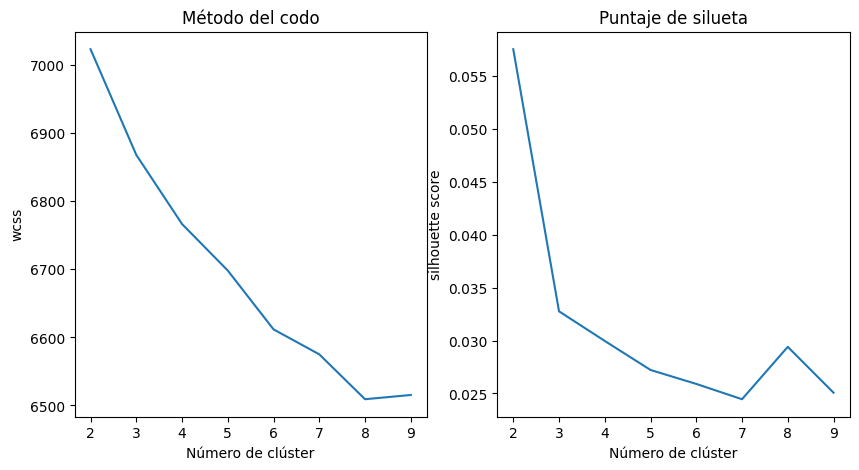

In [ ]:
silueta_score=[] # puntaje de silueta
wcss =[] #
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k, random_state=123)
  k_means.fit(X_count)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(X_count, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

# Resumen de texto

In [ ]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
eltiempo

,news_id,news_url_absolute,news_init_date,news_final_date,news_title,news_text_content,news_title_en,entidades
47,news10180,https://www.eltiempo.com/mundo/eeuu-y-canada/s...,2022-07-15,2022-07-30,Insolito: se disfrazo de abuela para robar un ...,Un criminal sorprendio a las autoridades de Mc...,INSOLITO: I disguise grandmother to steal a ba...,"INSOLITO,the United States"
57,news10204,https://www.eltiempo.com/economia/finanzas-per...,2022-07-30,2022-08-14,?En que consiste la banca grupal que comienza ...,"!hola! Aqui tambien puedes encontrar ""Mis Noti...",What is the group bank that begins to implemen...,
62,news10236,https://www.eltiempo.com/justicia/servicios/qu...,2022-07-30,2022-08-14,?Que debo hacer si no puedo pagar una deuda co...,"Esta semana, en el programa del Consultorio Ju...",What should I do if I can't pay a debt to my b...,
63,news10239,https://www.eltiempo.com/economia/finanzas-per...,2022-07-30,2022-08-14,"Billetera digital: Nequi, Daviplata, dale! y m...",Son las seis de la manana. Hace frio. Miles de...,"Digital Wallet: Nequi, Daviplata, Dale!And mor...","Nequi,Daviplata"
76,news10308,https://www.eltiempo.com/datos/gustavo-petro-y...,2022-07-15,2022-07-30,?Cuanto gastaron Gustavo Petro y Rodolfo Herna...,Segun los reportes en el portal Cuentas Claras...,? How much did Gustavo Petro and Rodolfo Herna...,Gustavo Petro
...,...,...,...,...,...,...,...,...
23322,news99764,https://www.eltiempo.com/economia/sectores/muj...,2022-07-30,2022-08-14,Mujeres tienen un mayor empleo formal que los ...,Con el cambio que establecio el Dane sobre la ...,Women have a greater formal job than men,
23324,news99785,https://www.eltiempo.com/colombia/otras-ciudad...,2022-07-30,2022-08-14,Posesion de Gustavo Petro: asi se vive el even...,Hoy es la ceremonia de posesion del presidente...,Possession of Gustavo Petro: This is how the e...,Gustavo Petro
23326,news99789,https://www.eltiempo.com/tecnosfera/novedades-...,2022-07-30,2022-08-14,Acoso digital: al menos el 30 por ciento de lo...,Una nueva encuesta global de la firma Kaspersk...,Digital harassment: at least 30 percent of Col...,Digital
23327,news99792,https://www.eltiempo.com/tecnosfera/novedades-...,2022-07-30,2022-08-14,"Asi funciona Starlink, el internet de Elon Mus...",Elon Musk tiene un nuevo y ambicioso proyecto ...,"This is how Starlink works, Elon Musk's Intern...",Colombia


In [ ]:

summary = summarizer(eltiempo["news_text_content"].iloc[0], do_sample=True)


In [ ]:
print(eltiempo["news_text_content"].iloc[0])
print(summary[0]["summary_text"])

Un criminal sorprendio a las autoridades de McDonough, a 30 minutos de Atlanta, en Georgia. El hombre, que fue captado por una camara de seguridad, logro extraer dinero de un banco disfrazado de una persona de la tercera edad. La victima fue el Chase Bank ubicado en el 323 de Jonesboro Road. El robo ocurrio el pasado 18 de julio cuando el sospechoso entro al lugar utilizando guantes de color naranja, peluca blanca y vestido conservador de flores. (Siga leyendo: Estados Unidos, en alerta por intensa ola de calor) . Segun los reportes del Departamento de Policia de McDonough, el hombre se acerco a un empleado del banco y le entrego una nota pidiendo que le entregaran una suma desconocida de dinero. Ademas, les aseguro que tenia un arma consigo. Luego de lograr su cometido, escapo del lugar en una camioneta blanca sin placas. De acuerdo con las autoridades, se trataria de un vehiculo marca Lexus. "El sospechoso ingreso al banco y presento una nota exigiendo dinero. El sospechoso le dijo a

¿Qué pasa si aplicamos el resumen a todas las noticias?